In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Read csv data file
file_path = "../Resources/MovieData_Clean.csv"
movie_data = pd.read_csv(file_path)
movie_data

,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,Poster,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Year of Release,Revenue (Millions),Runtime (Min)
0,110681,Kings of the Evening,2008-01-01,0.0,98682.0,tt1006904,PG,99 min,Drama,Andrew P. Jones,...,https://m.media-amazon.com/images/M/MV5BMjA3OT...,6.0,234,01 Nov 2010,Indican Pictures,Tuesday,January,2008,0.098682,99.0
1,26163,The Decline And Fall Of America,2008-01-01,7500.0,1200.0,tt1786696,NaN,120 min,Documentary,B.A. Brooks,...,https://m.media-amazon.com/images/M/MV5BMTMzNj...,5.2,13,NaN,NaN,Tuesday,January,2008,0.001200,120.0
2,13971,Wild Child,2008-01-01,20000000.0,21972336.0,tt1024255,PG-13,124 min,"Comedy, Drama, Romance",Nick Moore,...,https://m.media-amazon.com/images/M/MV5BNzUzYT...,6.1,"46,716",17 Nov 2009,Universal Pictures,Tuesday,January,2008,21.972336,124.0
3,6933,One Missed Call,2008-01-04,27.0,26.0,tt0479968,PG-13,87 min,"Horror, Mystery",Eric Valette,...,https://m.media-amazon.com/images/M/MV5BMjA2NT...,4.0,"30,026",22 Apr 2008,Warner Bros. Pictures,Friday,January,2008,0.000026,87.0
4,14423,First Sunday,2008-01-11,0.0,38804615.0,tt0486578,PG-13,96 min,"Comedy, Crime, Drama",David E. Talbert,...,https://m.media-amazon.com/images/M/MV5BMjE4MT...,4.5,"9,203",13 May 2008,NaN,Friday,January,2008,38.804615,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3167,503616,Second Act,2018-12-21,16000000.0,72282227.0,tt2126357,PG-13,103 min,"Comedy, Drama, Romance",Peter Segal,...,https://m.media-amazon.com/images/M/MV5BMjQ2Mj...,5.8,"18,337",12 Mar 2019,STXfilms,Friday,December,2018,72.282227,103.0
3168,424783,Bumblebee,2018-12-21,135000000.0,465895025.0,tt4701182,PG-13,114 min,"Action, Adventure, Sci-Fi",Travis Knight,...,https://m.media-amazon.com/images/M/MV5BMjUwNj...,6.8,"115,881",02 Apr 2019,Paramount Pictures,Friday,December,2018,465.895025,114.0
3169,426563,Holmes & Watson,2018-12-25,42000000.0,40462793.0,tt1255919,PG-13,90 min,"Comedy, Crime, Mystery",Etan Cohen,...,https://m.media-amazon.com/images/M/MV5BZTNjMj...,3.8,"24,394",09 Apr 2019,Columbia Pictures,Tuesday,December,2018,40.462793,90.0
3170,429197,Vice,2018-12-25,60000000.0,66266401.0,tt6266538,R,132 min,"Biography, Comedy, Drama",Adam McKay,...,https://m.media-amazon.com/images/M/MV5BMTY1Nj...,7.2,"97,207",02 Apr 2019,Annapurna Pictures,Tuesday,December,2018,66.266401,132.0


In [3]:
# Drop blanks (Runtime) and TV movies (Rating)
# Sort movie runtime from shortest to longest
movie_data = movie_data.dropna(subset=['Runtime (Min)'])
movie_data = movie_data[~movie_data['Rating'].isin(['TV'])]
sort_time = movie_data.sort_values("Runtime (Min)")

# Identify how I want cut the bins
max = sort_time["Runtime (Min)"].max()
min = sort_time["Runtime (Min)"].min()
print(f"The longest movie runtime is {max} mins.")
print(f"The shortest movie runtime is {min} mins.")


The longest movie runtime is 213.0 mins.
The shortest movie runtime is 3.0 mins.


In [4]:
# Identify runtime outliers
Q1 = np.percentile(sort_time['Runtime (Min)'], 25)
print("(Q1) Lower Quartile: %s"%(Q1))

Q2 = np.percentile(sort_time['Runtime (Min)'], 50)
print("(Q2) Median: %s"%(Q2))

Q3 = np.percentile(sort_time['Runtime (Min)'], 75)
print("(Q3) Upper Quartile: %s"%(Q3))

IQR = Q3 - Q1
print("Interquartile Range: %s"%(IQR))

upper_boundary = Q3 + (1.5 * IQR)
print("Upper Boundary: %s"%(upper_boundary))

lower_boundary = Q1 - (1.5 * IQR)
print("Lower Boundary: %s"%(lower_boundary))

# Remove any outliers (lower boundary)
sort_time = sort_time[sort_time['Runtime (Min)']>= lower_boundary]
sort_time

(Q1) Lower Quartile: 93.0
(Q2) Median: 104.0
(Q3) Upper Quartile: 117.0
Interquartile Range: 24.0
Upper Boundary: 153.0
Lower Boundary: 57.0


,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,Poster,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Year of Release,Revenue (Millions),Runtime (Min)
294,22215,Cheri,2009-02-10,23000000.0,9366227.0,tt0181371,NaN,57 min,Adult,NaN,...,https://m.media-amazon.com/images/M/MV5BMjE1MT...,3.4,13,NaN,NaN,Tuesday,February,2009,9.366227,57.0
846,134680,Billy Gardell: Halftime,2011-02-05,0.0,60.0,tt1860180,TV-14,60 min,"Documentary, Comedy",Manny Rodriguez,...,https://m.media-amazon.com/images/M/MV5BMTk3OT...,7.6,63,NaN,NaN,Saturday,February,2011,0.000060,60.0
231,274175,Buddha Wild: Monk in a Hut,2008-12-10,25000.0,275000.0,tt0449570,NOT RATED,60 min,"Documentary, Adventure, Comedy",Anna Wilding,...,https://ia.media-imdb.com/images/M/MV5BMTI3NzQ...,8.0,140,10 Dec 2006,Reality Entertainment,Wednesday,December,2008,0.275000,60.0
1101,119441,"Hetalia: Axis Powers: Paint It, White!",2011-11-22,250000.0,1950000.0,tt2653882,TV-MA,61 min,"Animation, Adventure, Comedy, History, Sci-Fi",Bob Shirohata,...,https://m.media-amazon.com/images/M/MV5BMDAxND...,6.6,244,22 Nov 2011,Studio Deen,Tuesday,November,2011,1.950000,61.0
1352,61012,Silent Hill: Revelation 3D,2012-10-26,20000000.0,52302796.0,tt4445580,NaN,63 min,Documentary,Eric Pinéda,...,NaN,NaN,NaN,NaN,NaN,Friday,October,2012,52.302796,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,338517,The Dawns Here Are Quiet,2015-05-22,3300000.0,5249225.0,tt0068161,PG-13,188 min,"Drama, History, War",Stanislav Rostotskiy,...,https://m.media-amazon.com/images/M/MV5BZDg2Yj...,8.3,"3,133",21 Jun 2005,NaN,Friday,May,2015,5.249225,188.0
2593,339408,The Birth of a Nation,2016-10-07,8500000.0,15861566.0,tt0004972,TV-PG,195 min,"Drama, History, War",D.W. Griffith,...,https://m.media-amazon.com/images/M/MV5BYTM4ZD...,6.4,"20,947",29 Jun 2004,Gravitas,Friday,October,2016,15.861566,195.0
2853,446173,Ex Libris: The New York Public Library,2017-09-13,0.0,151356.0,tt6209282,NaN,197 min,Documentary,Frederick Wiseman,...,https://m.media-amazon.com/images/M/MV5BOTBmMD...,7.5,843,NaN,Zipporah Films,Wednesday,September,2017,0.151356,197.0
2545,271969,Ben-Hur,2016-08-19,100000000.0,94061311.0,tt0052618,G,212 min,"Adventure, Drama, History",William Wyler,...,https://m.media-amazon.com/images/M/MV5BNjgxY2...,8.1,"207,163",13 Sep 2005,MGM,Friday,August,2016,94.061311,212.0


In [5]:
# Organize movie runtimes to bins
bins = [0, 60, 90, 120, 180, 240]
group_names = ["0-60mins", "60-90mins", "90-120mins", "120-180mins", "180-240mins"]
colors = ["red", "yellow", "blue", "green", "orange"]
sort_time["Movies Runtime Grouped(Mins)"] = pd.cut(sort_time["Runtime (Min)"], bins, labels=group_names)
sort_time
                                            


,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Year of Release,Revenue (Millions),Runtime (Min),Movies Runtime Grouped(Mins)
294,22215,Cheri,2009-02-10,23000000.0,9366227.0,tt0181371,NaN,57 min,Adult,NaN,...,3.4,13,NaN,NaN,Tuesday,February,2009,9.366227,57.0,0-60mins
846,134680,Billy Gardell: Halftime,2011-02-05,0.0,60.0,tt1860180,TV-14,60 min,"Documentary, Comedy",Manny Rodriguez,...,7.6,63,NaN,NaN,Saturday,February,2011,0.000060,60.0,0-60mins
231,274175,Buddha Wild: Monk in a Hut,2008-12-10,25000.0,275000.0,tt0449570,NOT RATED,60 min,"Documentary, Adventure, Comedy",Anna Wilding,...,8.0,140,10 Dec 2006,Reality Entertainment,Wednesday,December,2008,0.275000,60.0,0-60mins
1101,119441,"Hetalia: Axis Powers: Paint It, White!",2011-11-22,250000.0,1950000.0,tt2653882,TV-MA,61 min,"Animation, Adventure, Comedy, History, Sci-Fi",Bob Shirohata,...,6.6,244,22 Nov 2011,Studio Deen,Tuesday,November,2011,1.950000,61.0,60-90mins
1352,61012,Silent Hill: Revelation 3D,2012-10-26,20000000.0,52302796.0,tt4445580,NaN,63 min,Documentary,Eric Pinéda,...,NaN,NaN,NaN,NaN,Friday,October,2012,52.302796,63.0,60-90mins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,338517,The Dawns Here Are Quiet,2015-05-22,3300000.0,5249225.0,tt0068161,PG-13,188 min,"Drama, History, War",Stanislav Rostotskiy,...,8.3,"3,133",21 Jun 2005,NaN,Friday,May,2015,5.249225,188.0,180-240mins
2593,339408,The Birth of a Nation,2016-10-07,8500000.0,15861566.0,tt0004972,TV-PG,195 min,"Drama, History, War",D.W. Griffith,...,6.4,"20,947",29 Jun 2004,Gravitas,Friday,October,2016,15.861566,195.0,180-240mins
2853,446173,Ex Libris: The New York Public Library,2017-09-13,0.0,151356.0,tt6209282,NaN,197 min,Documentary,Frederick Wiseman,...,7.5,843,NaN,Zipporah Films,Wednesday,September,2017,0.151356,197.0,180-240mins
2545,271969,Ben-Hur,2016-08-19,100000000.0,94061311.0,tt0052618,G,212 min,"Adventure, Drama, History",William Wyler,...,8.1,"207,163",13 Sep 2005,MGM,Friday,August,2016,94.061311,212.0,180-240mins


  Runtime Grouped  Counts
0        0-60mins       3
1       60-90mins     522
2      90-120mins    1972
3     120-180mins     605
4     180-240mins       8


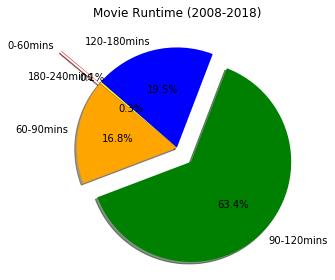

In [6]:
# Create a bar plot to show most common movie run time
time_counts = sort_time["Movies Runtime Grouped(Mins)"].value_counts(sort=False)
df_val_counts = pd.DataFrame(time_counts)
df_val_counts = df_val_counts.reset_index()
df_val_counts.columns = ['Runtime Grouped', 'Counts']
print(df_val_counts)


colors = ["red", "orange", "green", "blue", "yellow"]
explode = (0.5, 0, 0.2, 0, 0)
fig = plt.figure()
plt.pie(df_val_counts["Counts"], explode=explode, labels=group_names, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=1)
plt.title("Movie Runtime (2008-2018)")
plt.tight_layout()

plt.show()

save_file = os.path.join("..", "Images", "Movie Runtime Pie Chart.png")
fig.savefig(save_file)


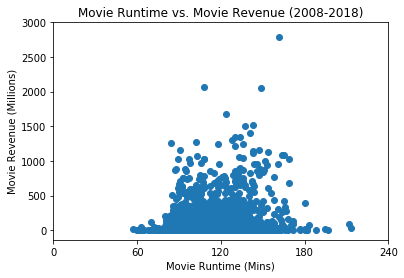

In [7]:
# Create a Scatter plot to show correlation between movie runtime and revenue
x = sort_time["Runtime (Min)"]
y = sort_time["Revenue (Millions)"]

fig = plt.figure()
plt.scatter(x, y)
plt.xlabel("Movie Runtime (Mins)")
plt.ylabel("Movie Revenue (Millions)")
plt.title("Movie Runtime vs. Movie Revenue (2008-2018)")
plt.xticks(np.arange(0, 300, 60))
plt.yticks(np.arange(0, 3500, 500))
plt.show()

save_file = os.path.join("..", "Images", "Movie Runtime vs Rev Scatter.png")
fig.savefig(save_file)
